## NLP SENTIMENT ANALYSIS

In [3]:

#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/ceyhun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ceyhun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ceyhun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
data = pd.read_csv("train.tsv",delimiter="\t")

In [7]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [8]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0])

<AxesSubplot:>

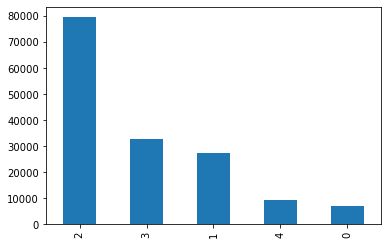

In [9]:
data.Sentiment.value_counts().plot.bar()

In [10]:
data ["Sentiment"].replace(0, value = 'negative', inplace = True)
data ["Sentiment"].replace(1, value = 'negative', inplace = True)

In [11]:
data ["Sentiment"].replace(3, value = 'positive', inplace = True)
data ["Sentiment"].replace(4, value = 'positive', inplace = True)

In [12]:
data.shape

(156060, 4)

In [13]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
data = data[data['Sentiment'] !=2]
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive


In [15]:
data.shape

(76478, 4)

<AxesSubplot:>

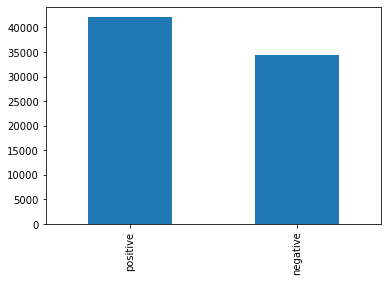

In [12]:
data.Sentiment.value_counts().plot.bar()

In [13]:
df = pd.DataFrame()
df['sentences'] = data["Phrase"]
df['Label'] = data['Sentiment']

In [14]:
df.head()

,sentences,Label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [15]:
# Rarewords filtreleme

In [16]:
rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
df.head()

,sentences,Label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [17]:
df.shape

(76478, 2)

# TEXT PREPROCESSING

In [18]:
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))

#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))

# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))

# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))

# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [19]:
df.head()

,sentences,Label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive


In [20]:
df.iloc[0]

sentences    series escapade demonstrating adage good goose...
Label                                                 negative
Name: 0, dtype: object

## Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"], df["Label"], random_state = 1)

In [22]:
X_train.head()

118788    present fascinating glimpse urban life class w...
89514     hey everybody wan na watch movie guy dressed c...
86857                               incredible number story
140626                         ultimately disappoint action
153243                                              unified
Name: sentences, dtype: object

In [23]:
y_train.head()

118788    positive
89514     negative
86857     positive
140626    negative
153243    positive
Name: Label, dtype: object

In [24]:
encoder = preprocessing.LabelEncoder()

In [25]:
y_train = encoder.fit_transform(y_train)

In [26]:
y_test = encoder.fit_transform(y_test)

In [27]:
y_train[:5]

array([1, 0, 1, 0, 1])

In [28]:
y_test[:5]

array([1, 0, 1, 0, 0])

## COUNT VECTORIZING

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [30]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [31]:
vectorizer.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [32]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
a = pd.DataFrame(X_train_count.toarray())

In [35]:
pd.set_option("display.max_columns",1000)

In [36]:
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315,12316,12317,12318,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329,12330,12331,12332,12333,12334,12335,12336,12337,12338,12339,12340,12341,12342,12343,12344,12345,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,12559,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610

## TF-IDF

In [37]:
tf_idf_word_vec = TfidfVectorizer()

In [38]:
tf_idf_word_vec.fit(X_train) # sadece X train ile fit ediyoruz

TfidfVectorizer()

In [39]:
X_train_tfidf = tf_idf_word_vec.transform(X_train)

In [40]:
X_test_tfidf = tf_idf_word_vec.transform(X_test)

In [41]:
tf_idf_word_vec.get_feature_names()[0:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [42]:
X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
a = pd.DataFrame(X_train_tfidf.toarray())

In [44]:
pd.set_option("display.max_columns",1000)

In [45]:
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308,12309,12310,12311,12312,12313,12314,12315,12316,12317,12318,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329,12330,12331,12332,12333,12334,12335,12336,12337,12338,12339,12340,12341,12342,12343,12344,12345,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359,12360,12361,12362,12363,12364,12365,12366,12367,12368,12369,12370,12371,12372,12373,12374,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,12559,12560,12561,12562,12563,12564,12565,12566,12567,12568,12569,12570,12571,12572,12573,12574,12575,12576,12577,12578,12579,12580,12581,12582,12583,12584,12585,12586,12587,12588,12589,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610

## CLASSIFICATION MODELS

### LOGISTIC REGRESSION

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7203 1440]
 [1011 9466]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8643
           1       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [48]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.827039748953975


In [49]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_tf = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_tf)

TF-IDF Accuracy: 0.8235878661087866


## XG BOOST CLASSIFIER

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[14:35:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[4120 4523]
 [ 619 9858]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62      8643
           1       0.69      0.94      0.79     10477

    accuracy                           0.73     19120
   macro avg       0.78      0.71      0.70     19120
weighted avg       0.77      0.73      0.71     19120



In [52]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_count , y_train)
xgb_accuracy_count = model_selection.cross_val_score(xgb_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy_count)

[14:35:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [53]:

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_tfidf , y_train)
xgb_accuracy_tf = model_selection.cross_val_score(xgb_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", xgb_accuracy_tf)

[14:35:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
# Make predictions
y_pred = dsc_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7164 1479]
 [1070 9407]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8643
           1       0.86      0.90      0.88     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.86      0.86     19120
weighted avg       0.87      0.87      0.87     19120



In [56]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_count , y_train)
dsc_accuracy_count = model_selection.cross_val_score(dsc_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", dsc_accuracy_count)

Count Vectors Accuracy: 0.7776673640167364


In [57]:
dsc_classifier = DecisionTreeClassifier()
dsc_classifier.fit(X_train_tfidf , y_train)
dsc_accuracy_tf = model_selection.cross_val_score(dsc_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", dsc_accuracy_tf)

TF-IDF Accuracy: 0.7751569037656904


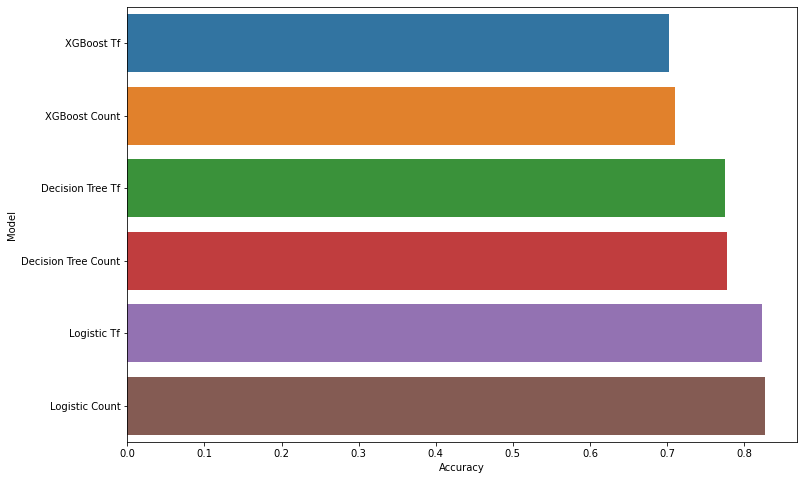

In [58]:
compare = pd.DataFrame({"Model": ["Logistic Count", "Logistic Tf", "XGBoost Count", "XGBoost Tf", "Decision Tree Count","Decision Tree Tf"],
                        "Accuracy": [log_accuracy_count, log_accuracy_tf, xgb_accuracy_count, xgb_accuracy_tf, dsc_accuracy_count,dsc_accuracy_tf]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)

In [ ]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'Label')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:37:26
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
sentences,Categorical
Label,Label
